In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path_dir = 'load_raw'
file_list = os.listdir(path_dir)
dataframes = []

for file in file_list:
    file_path = os.path.join(path_dir,file)
    df = pd.read_excel(file_path)
    dataframes.append(df)
print(dataframes[0])

           전력량 일보 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0             NaN        NaN        NaN        NaN        NaN        NaN   
1             NaN        NaN        NaN        NaN        NaN        NaN   
2             NaN        NaN        NaN        NaN        NaN        NaN   
3             NaN        NaN        NaN        NaN        NaN        NaN   
4             NaN        NaN        NaN        NaN        NaN        NaN   
5   2022년 07월 01일        NaN        NaN        NaN        NaN        NaN   
6              구분       SV-2        NaN        NaN        NaN        NaN   
7             NaN      전압 RS      전압 ST      전압 TR       전류 R       전류 S   
8              시간         KV         KV         KV          A          A   
9             00시       22.8       22.9       22.8       91.1       96.2   
10            01시       23.0       23.1       22.9       91.1       96.0   
11            02시       22.8       22.9       22.7       83.8       88.6   
12          

In [38]:
column_name = 'Unnamed: '
load_data = []
load_sum = 0
load_col = []
for i in range(1,len(dataframes[0].columns)):
    if(dataframes[0][column_name+str(i)][7]=='유효전력'):
        load_col.append(str(i))
print(load_col)
for q in range(0,len(dataframes)):
    load_data.append([])
    for f in range(9,33):
        load_sum=0
        for i in load_col:
            load_sum+=float(dataframes[q][column_name+i][f])
        load_data[q].append(round(load_sum,1))

['7', '18', '29', '37', '42', '47', '52', '57', '62', '67', '72', '77', '82', '87', '92', '97', '102', '107', '112', '117', '122', '127', '132', '137', '142', '147', '152']
[[16920.2, 16642.2, 16255.2, 15946.9, 15631.8, 15357.5, 16020.8, 17360.5, 21512.8, 22689.9, 22956.8, 23360.2, 23152.4, 23900.1, 23749.5, 23738.2, 23171.9, 20809.0, 19608.7, 17901.1, 17321.5, 16669.6, 16299.7, 16121.1], [15630.3, 15429.4, 14950.1, 14879.7, 14700.1, 14235.9, 14454.4, 14561.8, 14858.3, 15308.4, 15189.1, 15951.0, 15656.8, 16350.6, 16810.2, 16950.2, 17396.9, 17530.0, 17246.5, 17096.5, 17180.4, 16884.8, 16721.1, 16173.6], [15981.6, 15569.9, 15399.1, 14896.9, 14770.9, 14590.0, 14476.4, 14831.0, 14885.5, 15213.1, 15073.7, 15937.0, 16739.6, 16822.5, 17243.0, 17206.1, 17503.0, 17459.4, 17431.7, 17192.7, 17206.2, 17228.8, 16926.9, 16726.0], [16152.1, 16107.7, 15550.4, 15365.0, 15148.1, 15022.8, 16125.5, 16707.4, 21204.4, 22765.5, 23498.3, 24048.3, 23415.8, 23772.1, 23917.4, 23840.4, 23736.1, 21840.3, 21109.3, 

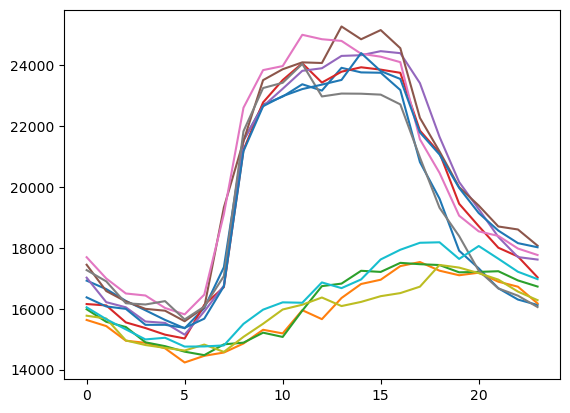

In [60]:
plt.plot(load_data[0])
plt.plot(load_data[1])
plt.plot(load_data[2])
plt.plot(load_data[3])
plt.plot(load_data[4])
plt.plot(load_data[5])
plt.plot(load_data[6])
plt.plot(load_data[7])
plt.plot(load_data[8])
plt.plot(load_data[9])
plt.plot(load_data[10])

In [65]:
load_np = np.array(load_data)
print(np.max(load_np))
print(np.min(load_np))

print(np.unravel_index(np.argmin(load_np), load_np.shape))
print(file_list[122])

25738.6
4354.8
(122, 4)
학사 일보.gcf_2022-08-30_23-59.xls


석사 일보.gcf_2022-08-31_23-59.xls


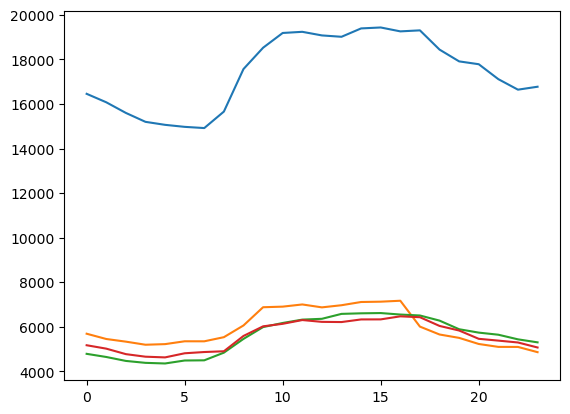

In [79]:
plt.plot(load_data[61])
plt.plot(load_data[121])
plt.plot(load_data[122])
plt.plot(load_data[123])
print(file_list[61])